In [46]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
digits = load_digits(as_frame = True)

In [12]:
df = pd.DataFrame(pd.concat((digits['data'],digits['target']), axis = 1))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df['target'], test_size = 0.2)

In [13]:
model1 = KNeighborsClassifier(n_neighbors = 3)

In [19]:
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
model1.score(X_test, y_test)

0.9805555555555555

In [23]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors' : range(1, 20)
}, cv = 4, verbose = 3)

In [24]:
clf.fit(df.drop('target', axis = 1), df['target'])

Fitting 4 folds for each of 19 candidates, totalling 76 fits
[CV 1/4] END .....................n_neighbors=1;, score=0.967 total time=   0.1s
[CV 2/4] END .....................n_neighbors=1;, score=0.967 total time=   0.0s
[CV 3/4] END .....................n_neighbors=1;, score=0.978 total time=   0.0s
[CV 4/4] END .....................n_neighbors=1;, score=0.960 total time=   0.0s
[CV 1/4] END .....................n_neighbors=2;, score=0.962 total time=   0.0s
[CV 2/4] END .....................n_neighbors=2;, score=0.955 total time=   0.0s
[CV 3/4] END .....................n_neighbors=2;, score=0.973 total time=   0.0s
[CV 4/4] END .....................n_neighbors=2;, score=0.962 total time=   0.0s
[CV 1/4] END .....................n_neighbors=3;, score=0.956 total time=   0.0s
[CV 2/4] END .....................n_neighbors=3;, score=0.953 total time=   0.0s
[CV 3/4] END .....................n_neighbors=3;, score=0.973 total time=   0.0s
[CV 4/4] END .....................n_neighbors=3;

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, verbose=3)

In [29]:
results = pd.DataFrame(clf.cv_results_)[['param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

In [32]:
results.sort_values(by = 'rank_test_score', ascending = True)

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
0,1,0.967725,0.006394,1
3,4,0.964392,0.010991,2
2,3,0.963276,0.008957,3
1,2,0.963273,0.006394,4
4,5,0.962723,0.008342,5
5,6,0.960495,0.008358,6
6,7,0.958271,0.010210,7
7,8,0.957157,0.007735,8
8,9,0.956606,0.013719,9
11,12,0.953820,0.015023,10


Text(0, 0.5, 'K')

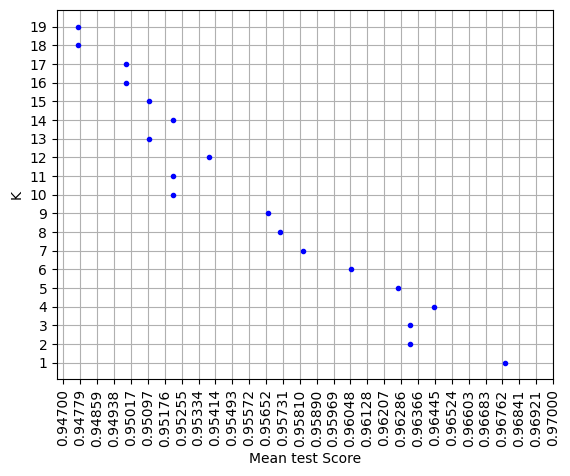

In [72]:
plt.plot(results.mean_test_score, results.param_n_neighbors, 'b.')
plt.xlabel('Mean test Score')
plt.xticks(ticks = np.linspace(0.947, 0.97, num = 30), rotation = 90)
plt.yticks(ticks = range(1, 20))
plt.grid()
plt.ylabel('K')

In [73]:
y_pred = model1.predict(X_test)

<AxesSubplot: >

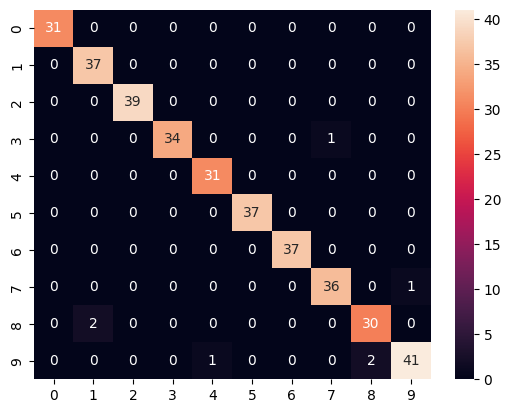

In [75]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        39
           3       1.00      0.97      0.99        35
           4       0.97      1.00      0.98        31
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        37
           7       0.97      0.97      0.97        37
           8       0.94      0.94      0.94        32
           9       0.98      0.93      0.95        44

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

